# Predicting Diabetes Progression Using Linear Regression

## Objective

To build a linear regression model to predict the progression of diabetes based on diagnostic measurements by analyzing features such as Age, gender, BMI, blood pressure, and other ailments. The model aims to assist in early diagnosis and preventive healthcare planning.

## Import relevant libraries

In [105]:
# Import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

## Load and preview the dataset

In [106]:
#Import the data
diabetes_data = pd.read_csv('diabetes_dirty.csv')
diabetes_data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [107]:
# Checking the shape of the dataset
diabetes_data.shape

(442, 11)

In [108]:
# Checking for missing values
diabetes_data.isnull().sum()

AGE            0
SEX            0
BMI            0
BP             0
S1             0
S2             0
S3             0
S4             0
S5             0
S6             0
PROGRESSION    0
dtype: int64

In [143]:
# Getting the descriptive statistics of the data
diabetes_data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [109]:
# Checking the shape and data types in our dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


There is no missing values in our dataset, now we can start with our visualization and analysis!

## Creating simple linear regression models using each feature against the target (PROGRESSION)

The independent variable is the variable that we manipulate to see if it has an effect or influence on the dependent variable. In short, its the cause. In this case, our independent variables are: age, sex, BMI, BP, S1, S2, S3, S4, S5, and S6.

The dependent variable is the variable that we measure to see if it is affected by the independent variable. In short, its the effect. In this case, our dependent variable is the person's progression (Progression) in the condition.Our variable Y is PROGRESSION

### Age Simple Linear Regression model 

In [110]:
# Select data and reshape
x = diabetes_data.iloc[:, 0].values
y = diabetes_data.iloc[:, 10].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

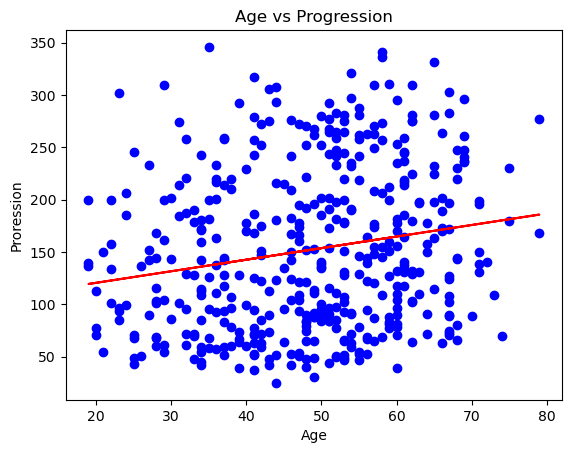

In [111]:
# Create an empty Linear Regression model
age_model = LinearRegression()

# Create a model using fit(x, y)
age_model.fit(x, y)

# Use the model to make a prediction
y_pred = age_model.predict(x)

# Plot model and data
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('Age vs Progression')
plt.xlabel('Age')
plt.ylabel('Proression')
plt.show()

The best-fit line in plot above is not too steep which indicates that age has a weak or modest effect on disease progression. Meaning, as people get older the progression score does not increase significantly.

### Sex Simple Linear Regression Model

In [112]:
# Select and reshape the data
x = diabetes_data.iloc[: , 1].values
y = diabetes_data.iloc[: , 10].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1) 

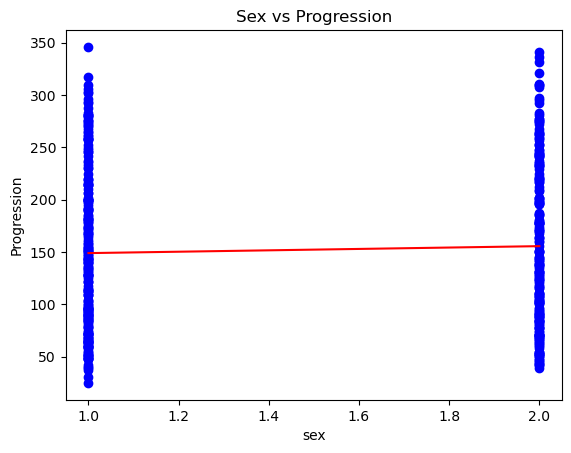

In [113]:
# Create an empty linear regression model
sex_model = LinearRegression()

# Create a model using fit(x, y)
sex_model.fit(x, y)

# Use the model to make prediction
y_pred = sex_model.predict(x)

# Plot the data and model
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('Sex vs Progression')
plt.xlabel('sex')
plt.ylabel('Progression')
plt.show()


The SEX independent variable can be ignored in our our multiple linear regression model. We would have use to logistic regression because sex is a categorical variable.

### BMI linear regression model

In [114]:
# Select and reshape the data
x = diabetes_data.iloc[: , 2].values
y = diabetes_data.iloc[: , 10].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

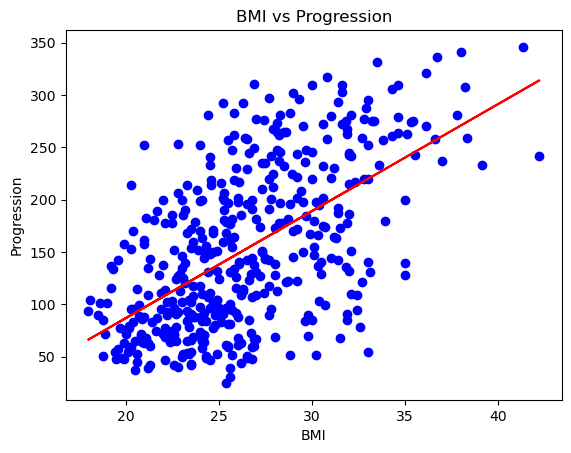

In [115]:
# Create an empty linear regression model
bmi_model = LinearRegression()

# Create a model using fit(x, y)
bmi_model.fit(x, y)

# Use the model to make prediction
y_pred = bmi_model.predict(x)

# Plot the data and model
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('BMI vs Progression')
plt.xlabel('BMI')
plt.ylabel('Progression')
plt.show()

The above plot shows that there is a strong positive correlation between the BMI and progression. The higher the BMI, the higher the disease progression. BMI is going to be an excellent feature in our multiple linear regression model!

BP simple linear regression model

In [116]:
# Select and reshape data
x = diabetes_data.iloc[:, 3].values
y = diabetes_data.iloc[:, 10].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

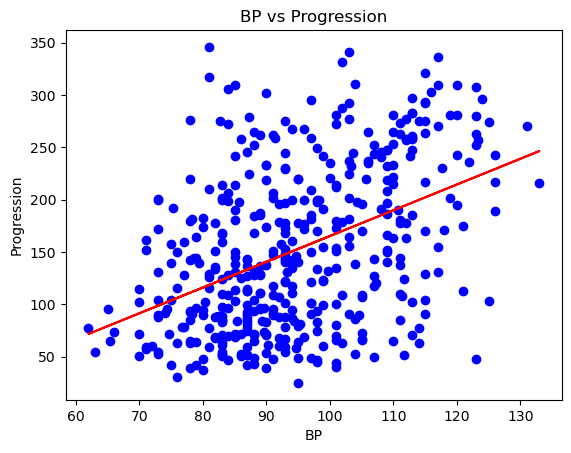

In [117]:
# Create an empty linear regression model
bp_model = LinearRegression()

# Create a model using fit(x, y)
bp_model.fit(x, y)

# Use the model to make prediction
y_pred = bp_model.predict(x)

# Plot the data and model
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('BP vs Progression')
plt.xlabel('BP')
plt.ylabel('Progression')
plt.show()

Our line of best-fit in the avove plot indicates that there is a positive correlation between BP and progression.

### S1 simple linear regression model

In [118]:
# Select and reshape data
x = diabetes_data['S1'].values
y = diabetes_data['PROGRESSION'].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

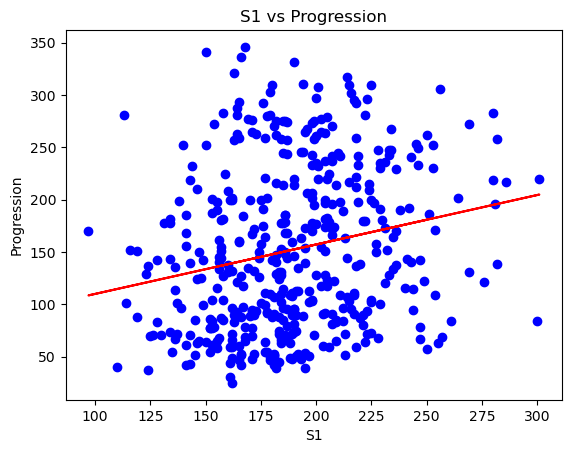

In [119]:
# Create an empty linear regression model
s1_model = LinearRegression()

# Create a model using fit(x, y)
s1_model.fit(x, y)

# Use the model to make prediction
y_pred = s1_model.predict(x)

# Plot the data and model
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('S1 vs Progression')
plt.xlabel('S1')
plt.ylabel('Progression')
plt.show()

The S1 vs Progression plot above indicates that there is a positive correlation between the two variables.

### S2 simple linear regression model


In [120]:
# Select and reshape data
x = diabetes_data.iloc[:, 5].values
y = diabetes_data.iloc[:, 10].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

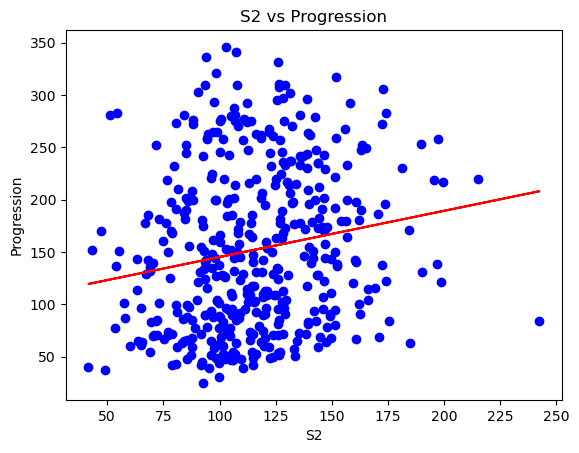

In [121]:
# Create an empty linear regression model
s2_model = LinearRegression()

# Create a model using fit(x, y)
s2_model.fit(x, y)

# Use the model to make prediction
y_pred = s2_model.predict(x)

# Plot the data and model
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('S2 vs Progression')
plt.xlabel('S2')
plt.ylabel('Progression')
plt.show()

The S2 vs Progression slope of the line of best is slightly positive indicating that the relationship between the two variables is positive but not too strong

### S3 simple linear regression model

In [122]:
# Select and reshape data
x = diabetes_data['S3'].values
y = diabetes_data['PROGRESSION'].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

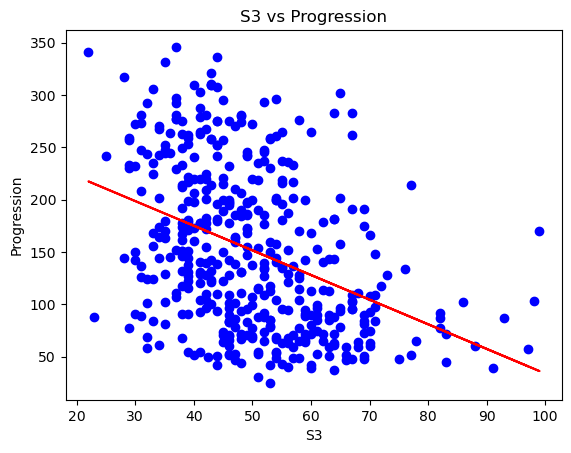

In [123]:
# Create an empty linear regression model
s3_model = LinearRegression()

# Create a model using fit(x, y)
s3_model.fit(x, y)

# Use the model to make prediction
y_pred = s3_model.predict(x)

# Plot the data and model
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('S3 vs Progression')
plt.xlabel('S3')
plt.ylabel('Progression')
plt.show()

The slope of the line of best fit (decreasing slope) in the S3 vs progression plot indicates a negative correlation between the two variables. There is a strong negative relationship.

### S4 simple linear regression model

In [124]:
# Select and reshape data
x = diabetes_data['S4'].values
y = diabetes_data['PROGRESSION'].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

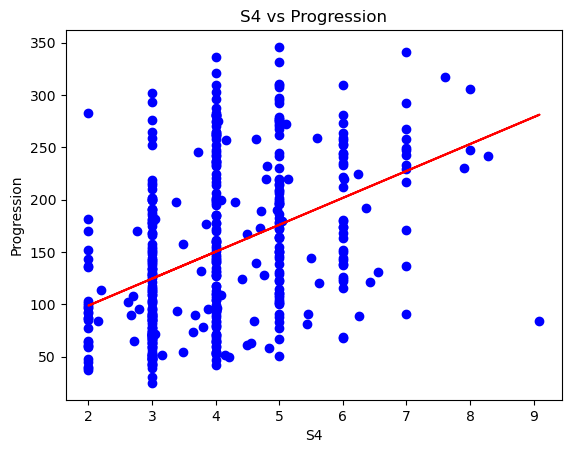

In [125]:
# Create an empty linear regression model
s4_model = LinearRegression()

# Create a model using fit(x, y)
s4_model.fit(x, y)

# Use the model to make prediction
y_pred = s4_model.predict(x)

# Plot the data and model
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('S4 vs Progression')
plt.xlabel('S4')
plt.ylabel('Progression')
plt.show()

### S5 simple linear regression model

In [126]:
# Select and reshape data
x = diabetes_data['S5'].values
y = diabetes_data['PROGRESSION'].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

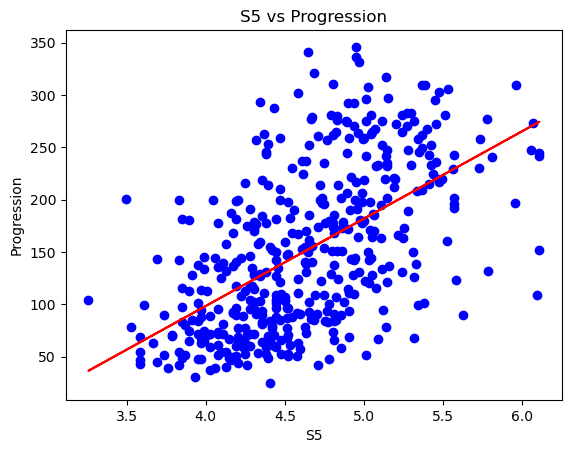

In [127]:
# Create an empty linear regression model
s5_model = LinearRegression()

# Create a model using fit(x, y)
s5_model.fit(x, y)

# Use the model to make prediction
y_pred = s5_model.predict(x)

# Plot the data and model
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('S5 vs Progression')
plt.xlabel('S5')
plt.ylabel('Progression')
plt.show()

The slope of our line of best fit in the above S5 vs Progression plot increases rapidly indicating a strong positive correlation between the two variable.

### S6 Simple linear regression model

In [128]:
# Select and reshape data
x = diabetes_data['S6'].values
y = diabetes_data['PROGRESSION'].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

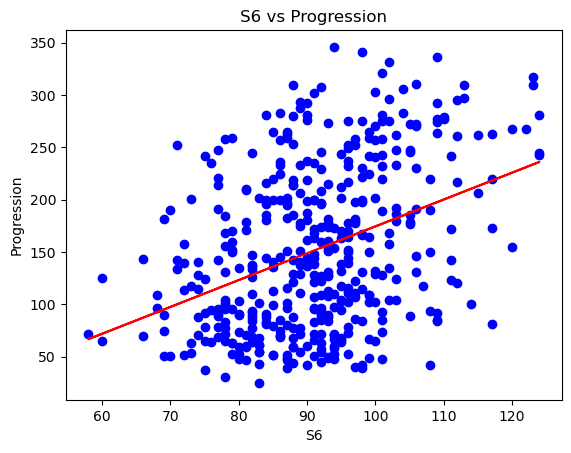

In [129]:
# Create an empty linear regression model
s6_model = LinearRegression()

# Create a model using fit(x, y)
s6_model.fit(x, y)

# Use the model to make prediction
y_pred = s6_model.predict(x)

# Plot the data and model
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.title('S6 vs Progression')
plt.xlabel('S6')
plt.ylabel('Progression')
plt.show()

The slope of our line of best fit in above S6 vs Progression plot above incresases significantly indicating a strong positive correlation between the two variables.

## Building The Multiple Linear Regression

Rather than running separate simple linear regression models for each independent variable, a more effective and quicker approach would be to analyse their correlations using a heatmap or pairplot before proceeding with multiple regression. This would help identify which variables have the strongest relationships with the dependent variable, allowing for a more informed feature selection process.

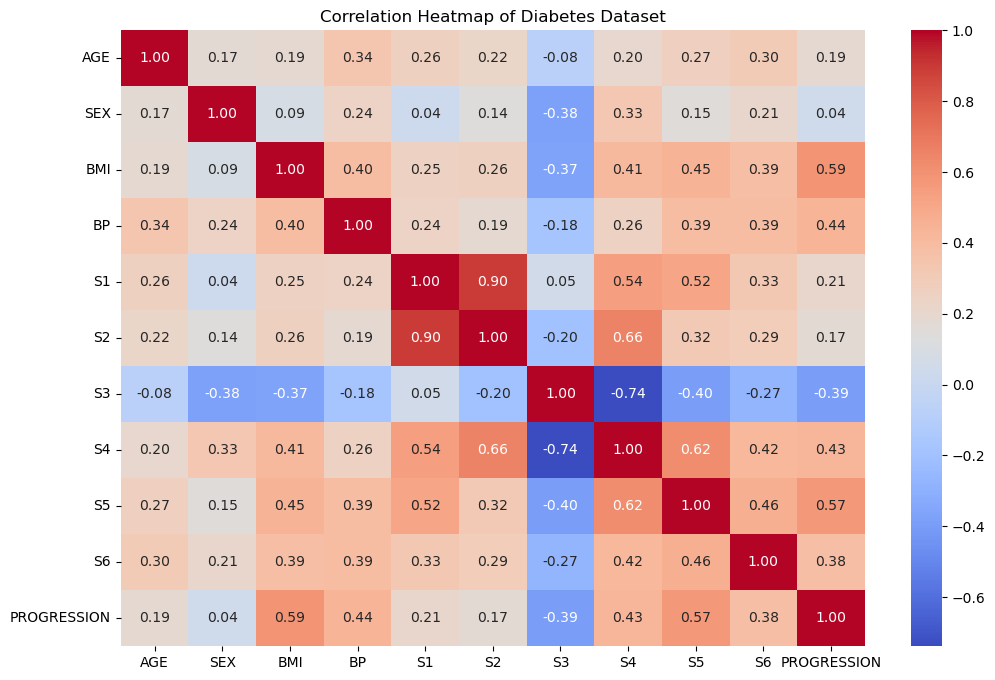

In [130]:
# Creating a correlation matrix
correlation_matrix = diabetes_data.corr()

# Plotting the heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

From the heatmap above, it is clear that independent variables that have a stronger positive correlation with the dependent variable are BMI (0.59), S5 (0.57), BP (0.44), S4 (0.43), ans S6 (0.38).
The variables that have a weak positive correlation vs progression are S1 (0.21), AGE (0.19), S2 (0.17) & SEX (0.04).
Only S3 (-0.39) has a negative correlation vs progression. S3 also has a negative correlation vs other independent variable.

### Selecting out independent (X) and dependent (y) variables for the multiple linear regression

In [131]:
# Selecting our X values
X = diabetes_data.iloc[: ,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values
X[1:4]                 # Showing the first three rows.

array([[ 48.    ,   1.    ,  21.6   ,  87.    , 183.    , 103.2   ,
         70.    ,   3.    ,   3.8918,  69.    ],
       [ 72.    ,   2.    ,  30.5   ,  93.    , 156.    ,  93.6   ,
         41.    ,   4.    ,   4.6728,  85.    ],
       [ 24.    ,   1.    ,  25.3   ,  84.    , 198.    , 131.4   ,
         40.    ,   5.    ,   4.8903,  89.    ]])

In [132]:
# Selecting our y values
y = diabetes_data['PROGRESSION'].values
y[1:4]

array([ 75, 141, 206])

In [133]:
# Reshape the data
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# Create an empty linear regression model
progression_model = LinearRegression()

# Fit the model using fit(X, y)
progression_model.fit(X, y)

# Get intercept and coefficients.
print('intercept: \n', progression_model.intercept_)
print('coefficients: \n', progression_model.coef_)

intercept: 
 [-334.56713852]
coefficients: 
 [[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
  -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
   6.84831250e+01  2.80116989e-01]]


### Split the data into Training and Test set (80:20 split)

In [134]:
# Split the data into training and test set
rseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= rseed)

print('training data: \n', X_train.shape, y_train.shape)
print('test data: \n', X_test.shape, y_test.shape)

training data: 
 (353, 10) (353, 1)
test data: 
 (89, 10) (89, 1)


### Scaling of the data

We must plot the statistical distribution of our data to decide if we should use standardisation or normalisation for feature scaling. 

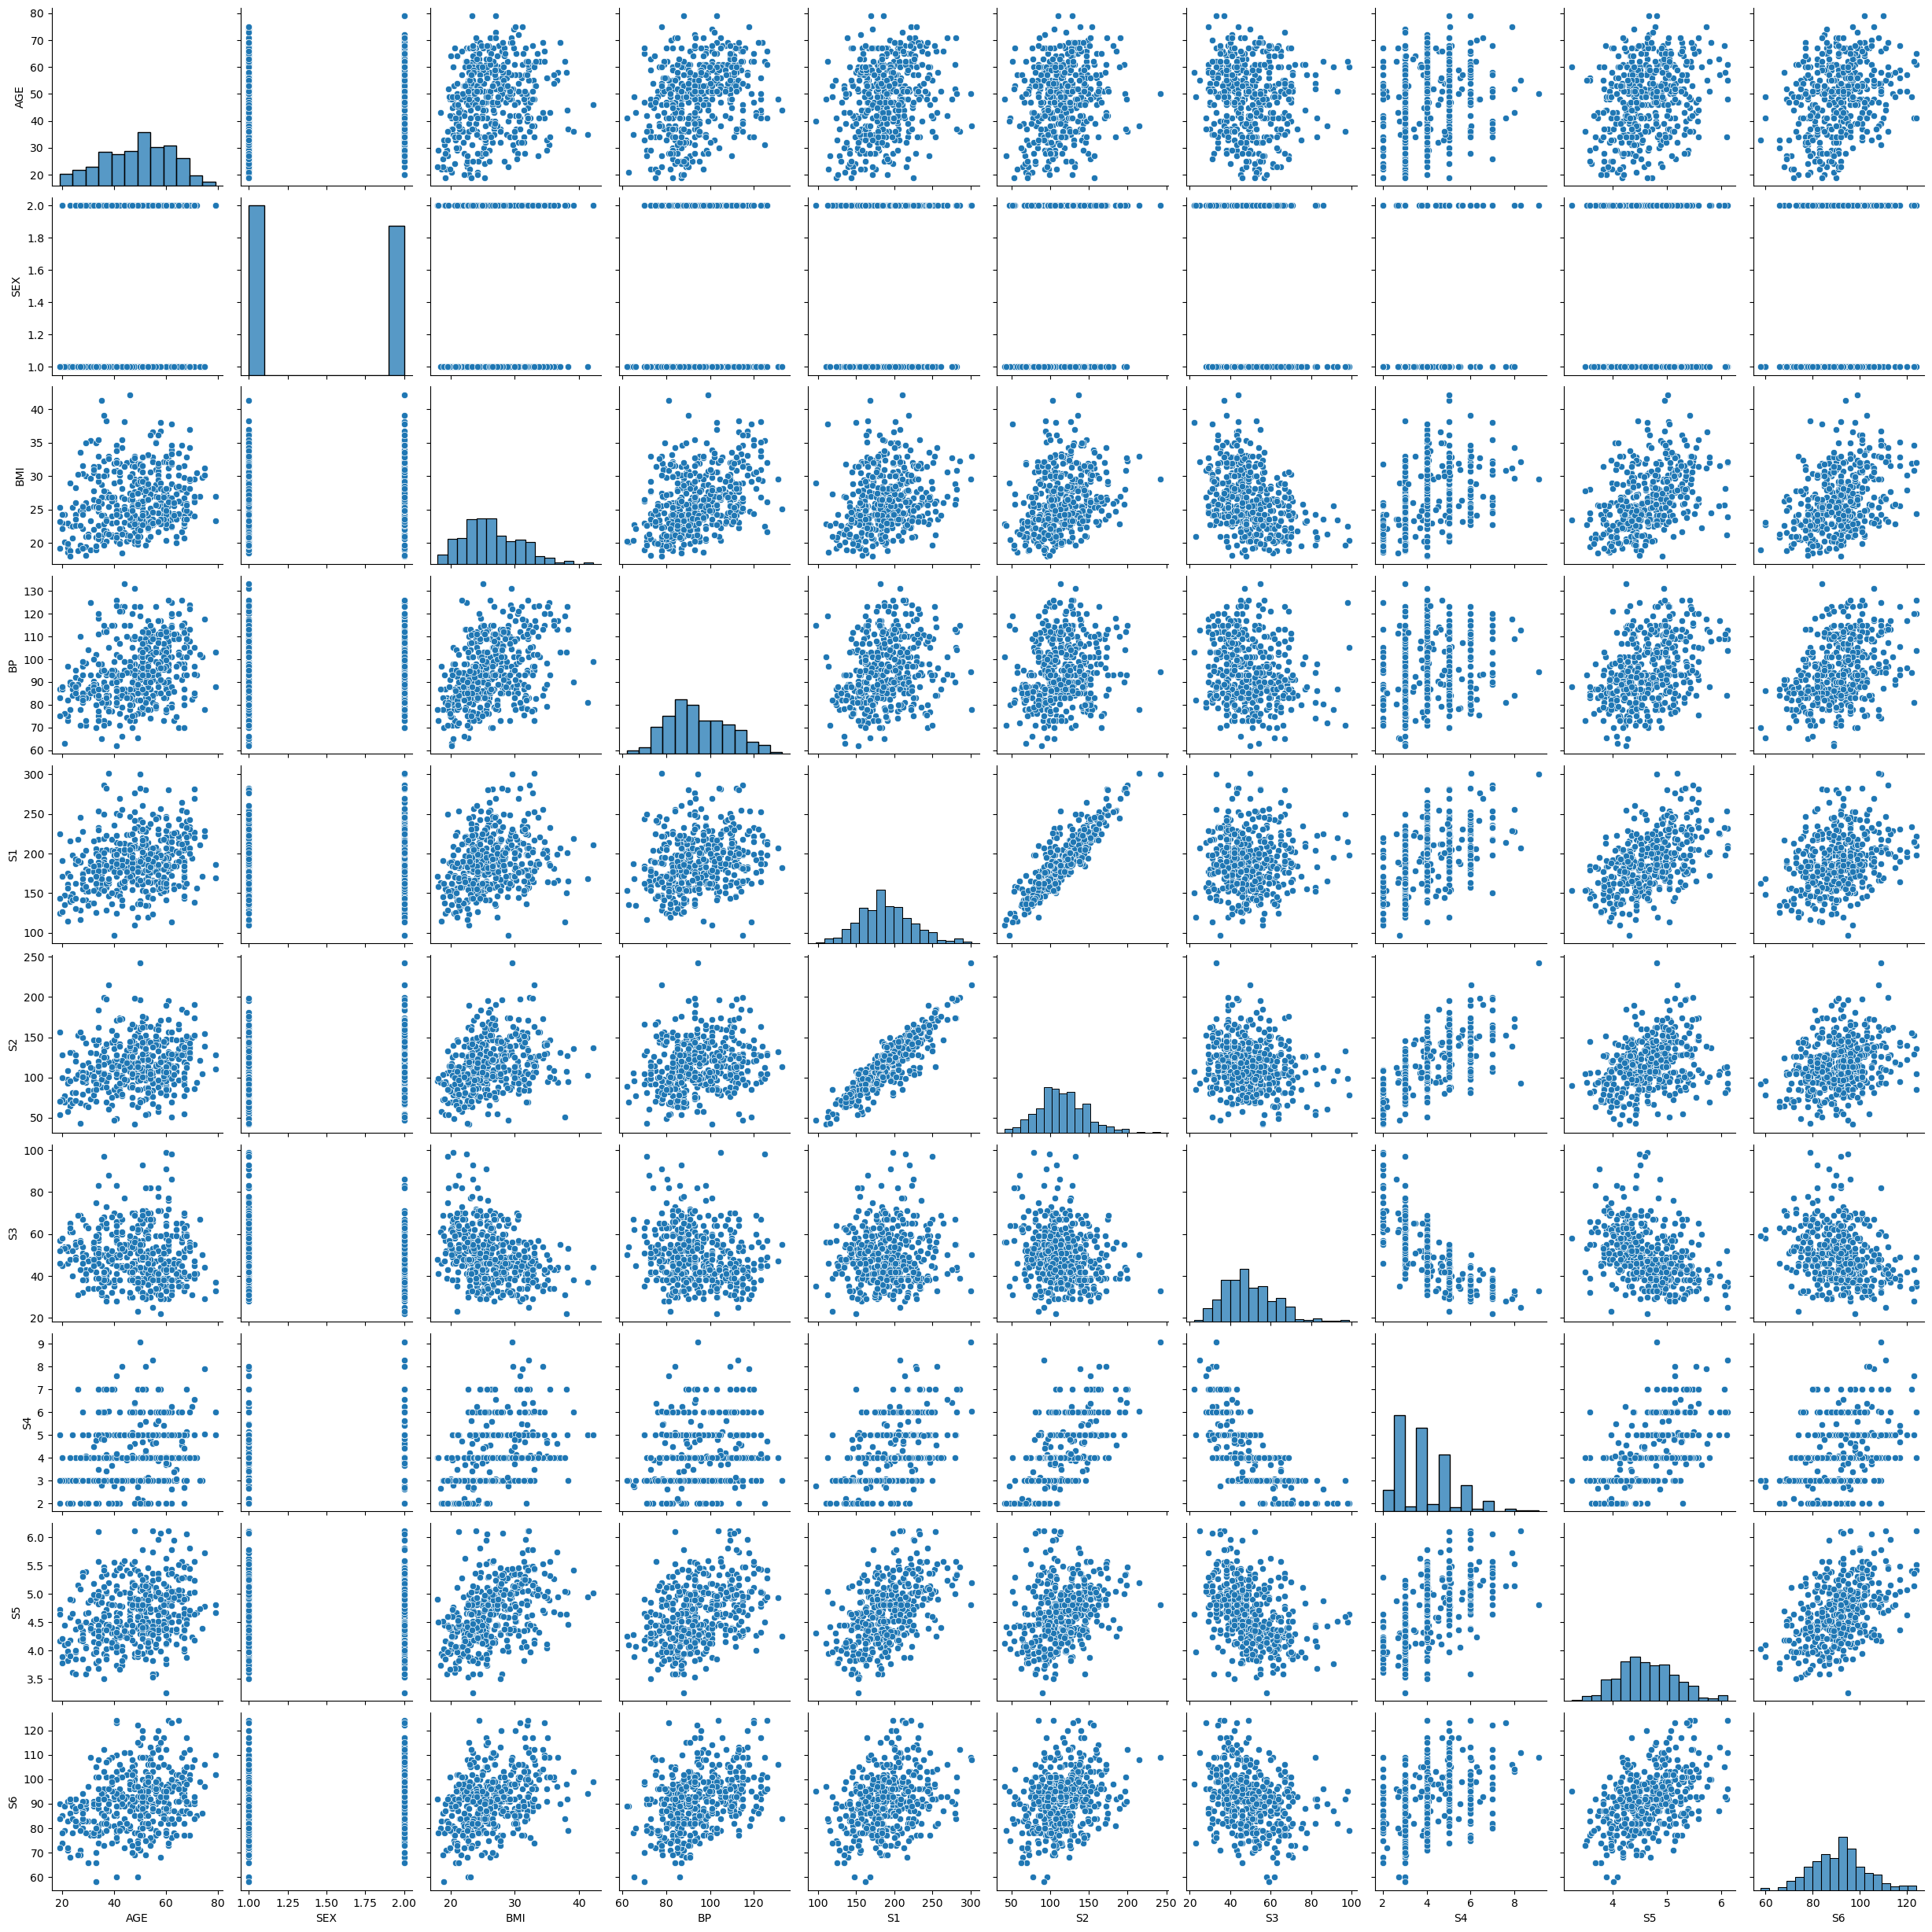

In [135]:
# Plot the distribution of the data (exclude the target)
sns.pairplot(data = diabetes_data.drop('PROGRESSION', axis =1))

From the pairplot above, most of our data follow a Gaussian (or normal) distribution. Only the sex and s4 that do not. We will conclude by using standardisation for scaling, by using StandardScaler. We only fit the scaler on the training set and nothing on the test set.

In [136]:
# Fit the scaler on train data
scaler = StandardScaler()
scaler.fit(X_train)

# Apply the scaler on training and test data to transform the data
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using a 0.20 test zise splits our data of 442 items into a training set of 353 observations and 10 columns, and a test set of 89 observations and 1 columns. We can use this to evaluate our model.

### Fit the model on the training data, get intercept, coefficients and make predictions

In [137]:
# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test) 

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [-341.37823633]
Coefficients: 
 [[  0.13768782 -23.06446772   5.84636265   1.19709252  -1.28168474
    0.81115203   0.60165319  10.15953917  67.1089624    0.20159907]]


In [138]:
# Predictions
predictions[0:5]

array([[139.5475584 ],
       [179.51720835],
       [134.03875572],
       [291.41702925],
       [123.78965872]])

### Model Performance Evaluation

In [142]:
# R squared score for the model on the test set
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions)) 

print ("R2 Score:", round (model.score(X_test, y_test), 4))
print("Mean square error: ", mse) 
print("Root mean square error: ", rmse)

R2 Score: 0.4526
Mean square error:  22848.80915318661
Root mean square error:  151.15822555582812


Our R-squared score value is 0.4526 is is very far away from 1. This means that our model does not fit our observations quite well. More the half (about 55%) of the variance remained unexplained by our model. I think this was caused by the features SEX (of which logistic regression has to be used) and S4 (which has a negative correlation vs progression)
Furthermore, since we a dealing with medical data, this r2 value may be acceptable because medical datasets are noisy and complex. Disease progression may be influenced by many other interacting factors such as genetics, lifestyle, environment and what, how, when, why is a particular medication(s) being taken etc.

Our Root Mean Square Error (RMSE) is 151.16. Since the typical value of our target variable ranges between 25 and 346 an error of 151.16 is very large, the model is not very accurate. 